In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import chi2_contingency

In [18]:
df = pd.read_csv(r'..\..\data\Cleaned_data\cancat.csv')

In [19]:
replce_val={
    'Attack by an elephant':'Natural',
    'Body destroyed':'Natural',
    'Injured':'Natural',
    'Septicemia':'Natural',
    'Flood':'Natural',
    'Broken the Spinal':'Natural',
    'Drought':'Natural',
    'Nivukeniya':'Natural',
    'Severe hemorrhage':'Natural',
    'Liver floot':'Natural',
    'Garbage consumption':'Natural',
    'Drowned':'Natural',
    'Fallen into well':'Natural',
    'Disease':'Natural',
    'Eaten polythene':'Other',
    'Falling of a mountain':'Natural'



}
df['Cause of Death']=df['Cause of Death'].replace(replce_val)

In [20]:
districts = gpd.read_file(r'D:\UOP\4th year\Research\District_geo.json')

districts.rename(columns={'ADM2_EN': 'District'}, inplace=True)

districts = districts[districts['District'] != '[unknown]']

# Create a list of unique regions
unique_regions = df['Region'].unique()

# Create a dropdown widget for region selection
region_selector = widgets.Dropdown(options=unique_regions, description='Select Region')

def update_map(selected_region):
    plt.clf()
    region_data = df[df['Region'] == selected_region]

    merged_data = districts.merge(region_data, on='District', how='left')
    merged_data['Region'].fillna('Other', inplace=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    
    merged_data.plot(column='Region', cmap='Greens', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

    merged_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', va='bottom'), axis=1)

    plt.title(f'Elephant Deaths in {selected_region}')
    
    plt.show()

widgets.interactive(update_map, selected_region=region_selector)


interactive(children=(Dropdown(description='Select Region', options=('Southern', 'North Western', 'Eastern', '…

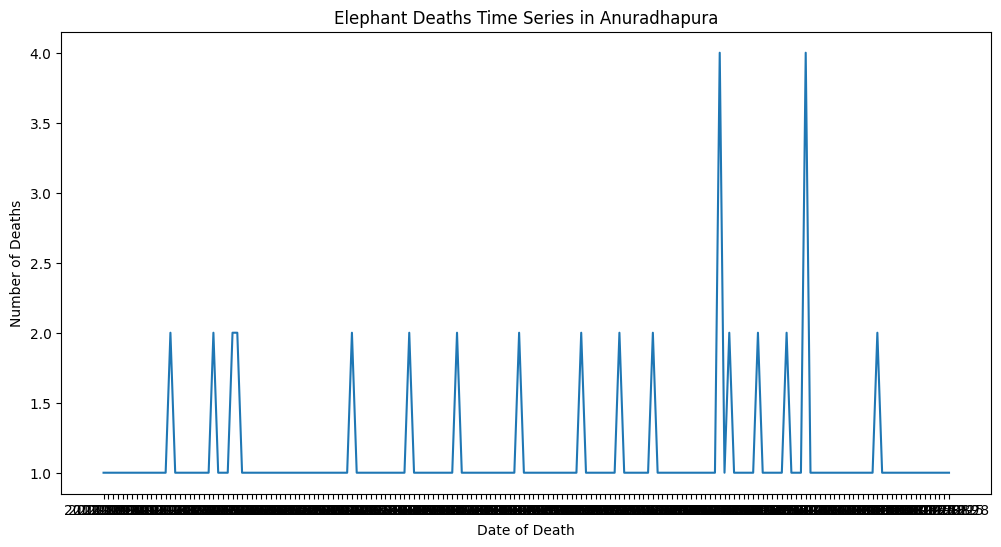

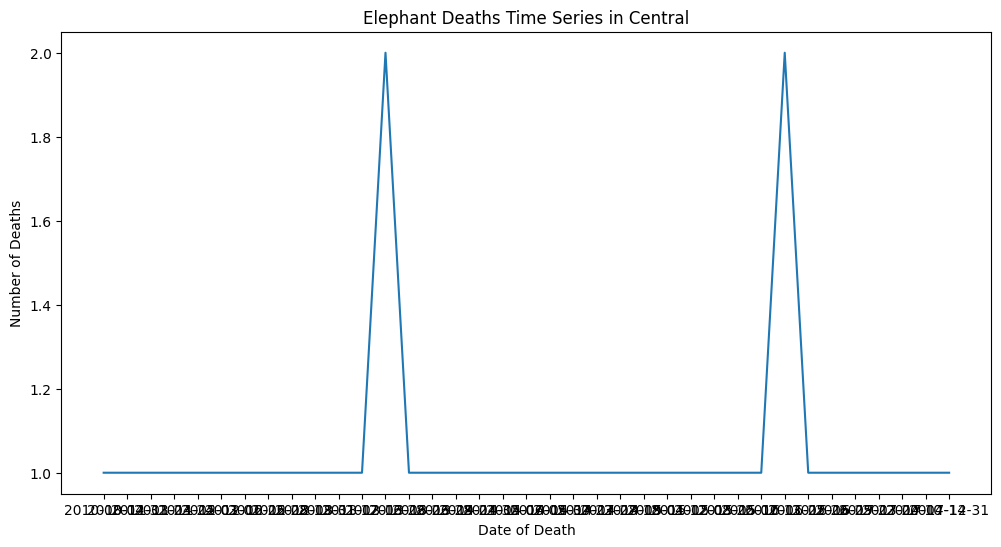

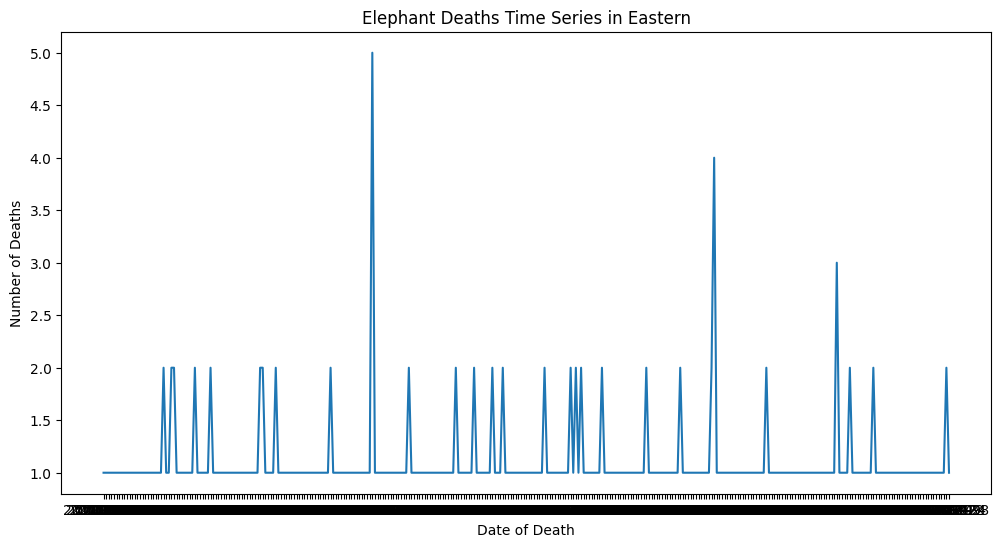

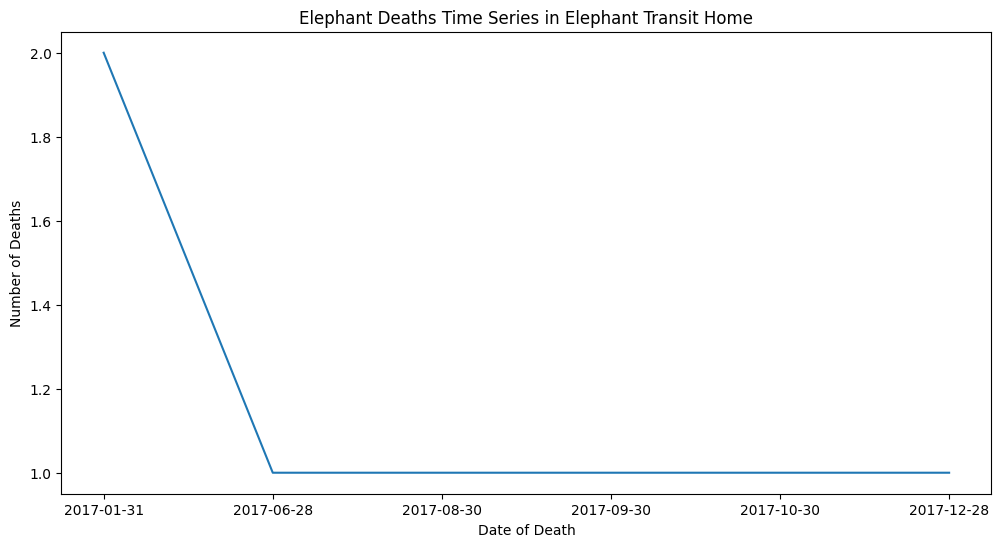

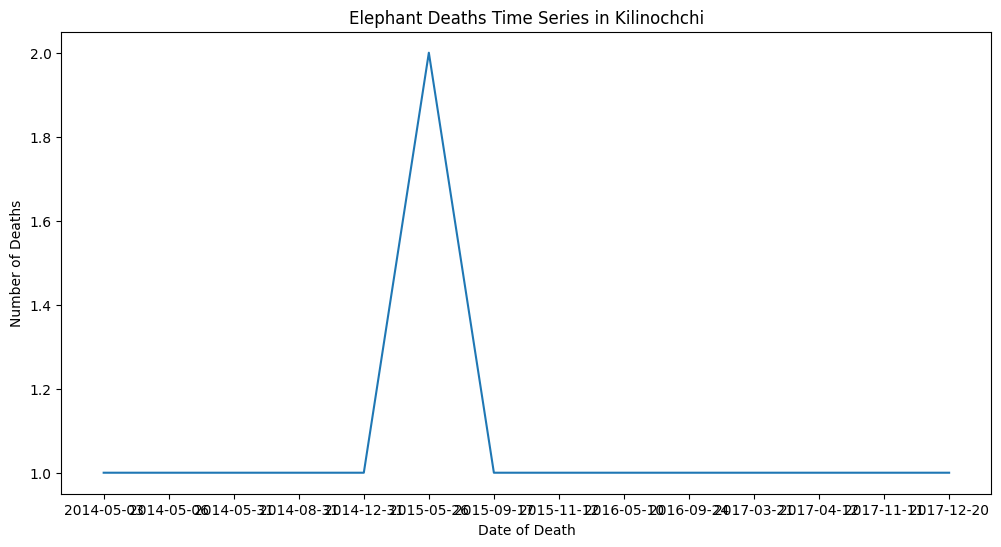

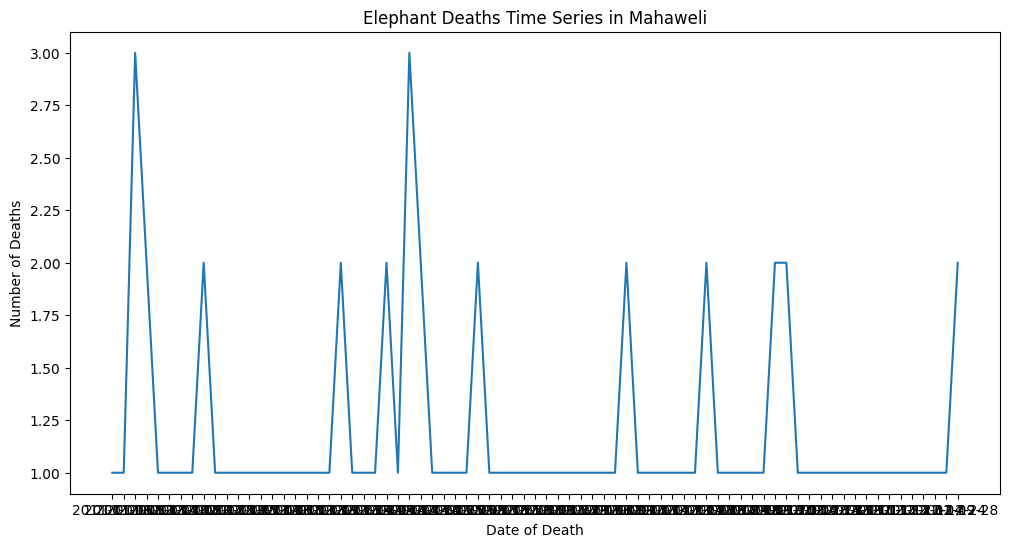

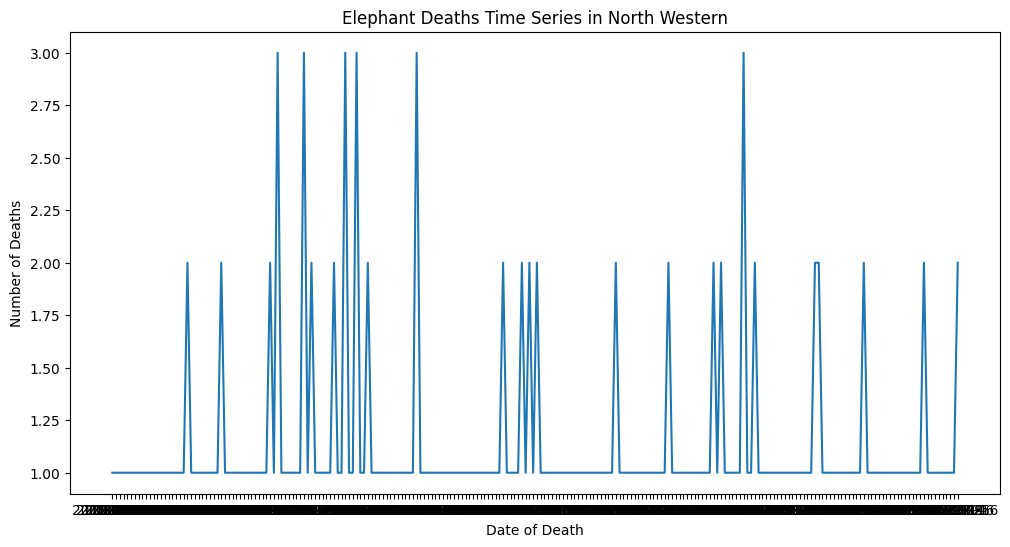

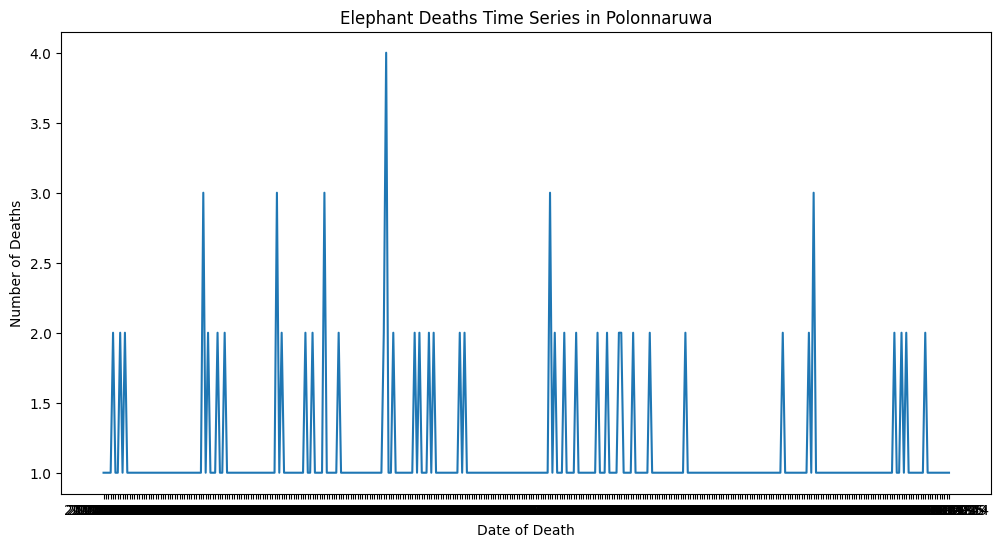

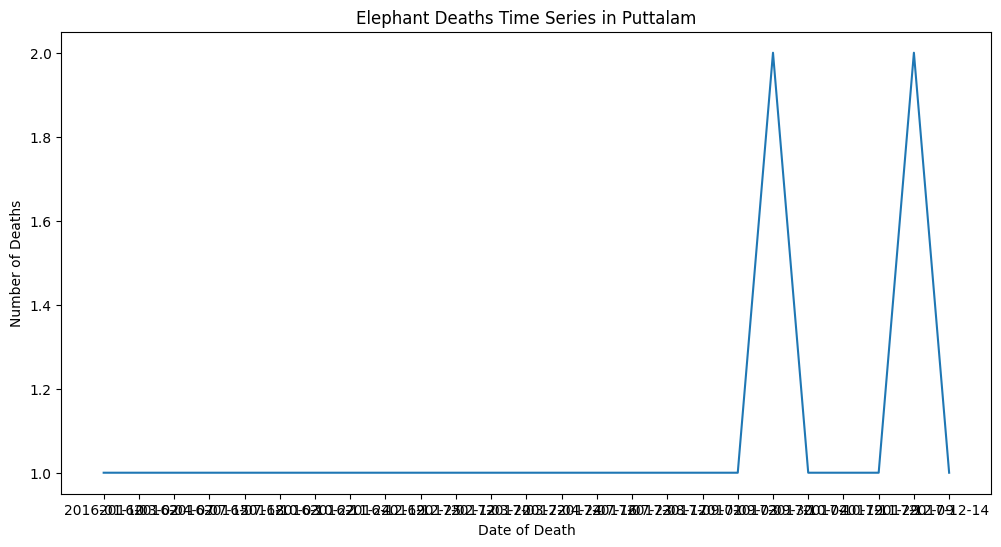

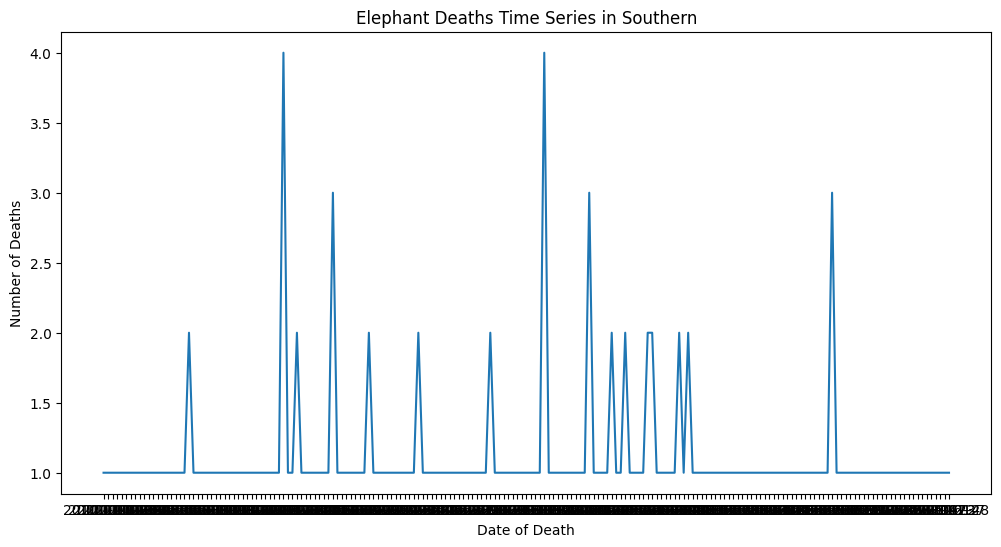

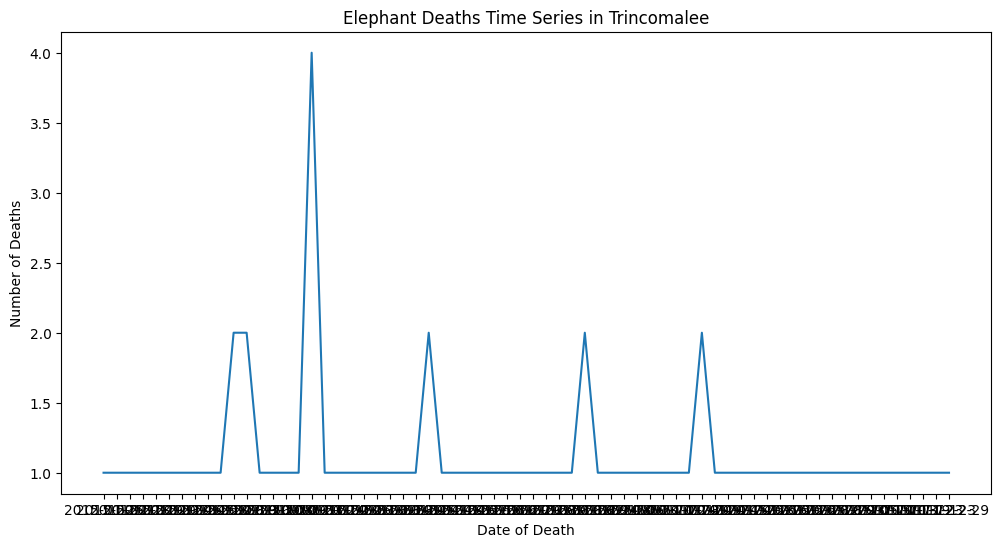

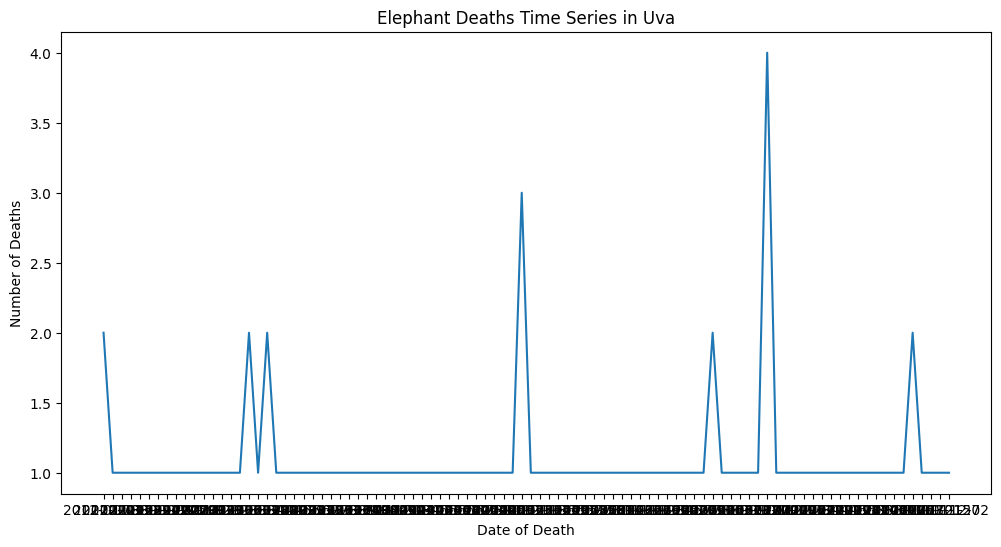

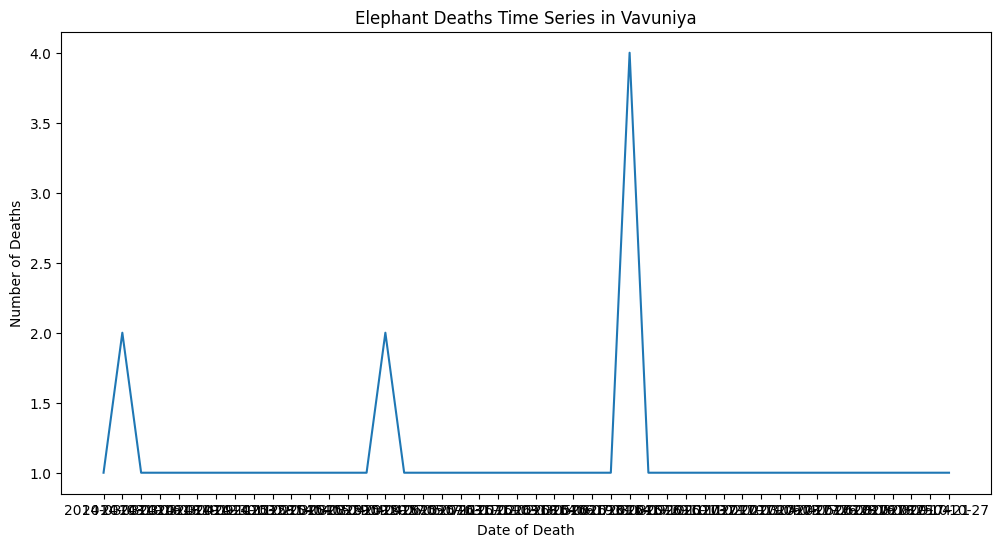

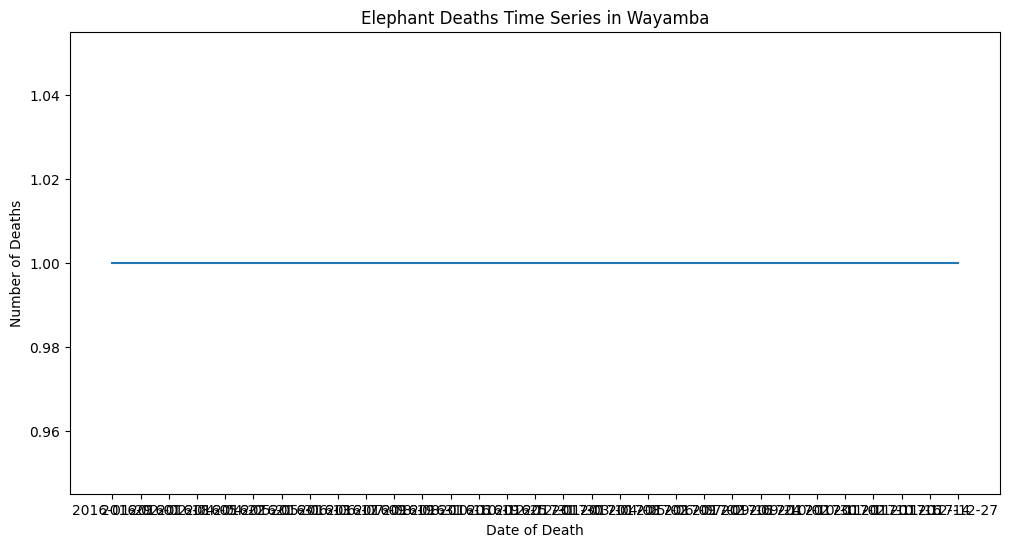

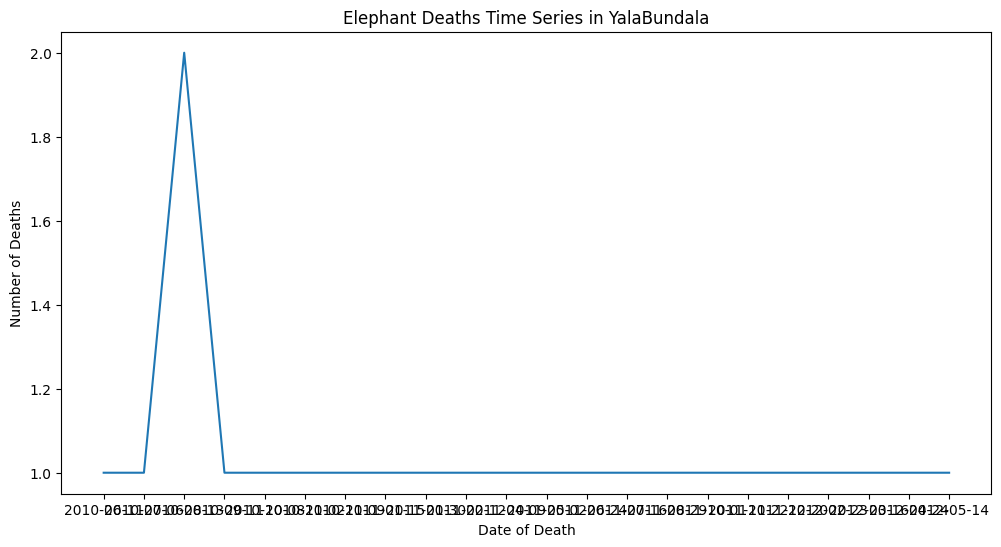

In [21]:
region_groups = df.groupby('Region')

# Iterate through region groups and plot a time series for each region
for region, region_data in region_groups:
    # Group data by date and count the number of deaths per day
    daily_deaths = region_data.groupby('Date of Death').size()

    plt.figure(figsize=(12, 6))
    plt.title(f'Elephant Deaths Time Series in {region}')
    plt.xlabel('Date of Death')
    plt.ylabel('Number of Deaths')
    plt.plot(daily_deaths.index, daily_deaths.values)
    plt.show()

<Axes: title={'center': 'Total Elephant Deaths by Region'}, ylabel='Region'>

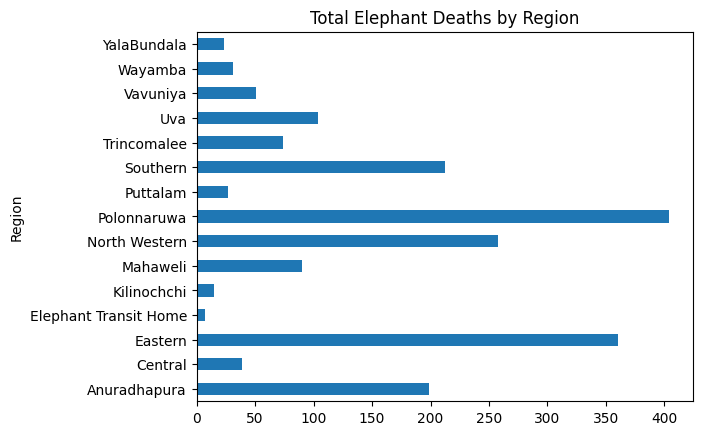

In [22]:
region_groups = df.groupby('Region')
total_deaths_by_region = region_groups.size()
total_deaths_by_region.plot(kind='barh', title='Total Elephant Deaths by Region')

## Get the top 3 Regions
+ Polonnaruwa
+ North Western
+ Eastern

In [23]:
top_3_regions = ['Polonnaruwa', 'North Western', 'Eastern']

top_regions = df[df['Region'].isin(top_3_regions)]
top_regions = top_regions.reset_index(drop=True)
top_regions['No'] = top_regions.index + 1

top_regions.head()

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
1,2,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
2,3,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile
3,4,North Western,Kurunegala,Pannala,2010-01-16,Gunshot,Male,35-40,Subadults and adults
4,5,North Western,Puttalam,Unknown,2010-01-20,Gunshot,Male,7,Juvenile


In [24]:
percentage_top_regions = (len(top_regions) / len(df)) * 100
print(f'Percentage of top 3 regions: {percentage_top_regions:.2f}%')


Percentage of top 3 regions: 53.96%


In [25]:
top_regions['Region'].value_counts()

Region
Polonnaruwa      404
Eastern          360
North Western    258
Name: count, dtype: int64

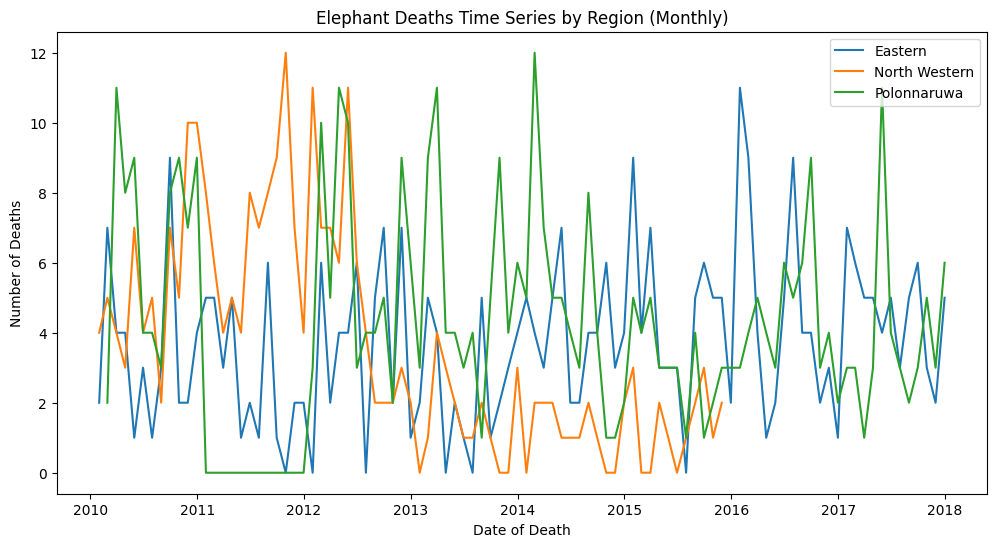

In [26]:
# Group the data by 'Region'
region_groups = top_regions.groupby('Region')

# Customize your plots if needed
plt.figure(figsize=(12, 6))
plt.title('Elephant Deaths Time Series by Region (Monthly)')
plt.xlabel('Date of Death')
plt.ylabel('Number of Deaths')

# Iterate through region groups and plot time series for each region
for region, region_data in region_groups:
    # Convert 'Date of Death' to datetime and set it as the index
    region_data['Date of Death'] = pd.to_datetime(region_data['Date of Death'])
    region_data.set_index('Date of Death', inplace=True)
    
    # Resample data to monthly frequency and count the number of deaths per month
    monthly_deaths = region_data.resample('M').size()
    
    # Plot the time series for the region
    plt.plot(monthly_deaths.index, monthly_deaths.values, label=region)

# Add a legend to distinguish regions
plt.legend()
plt.show()


## Region_District

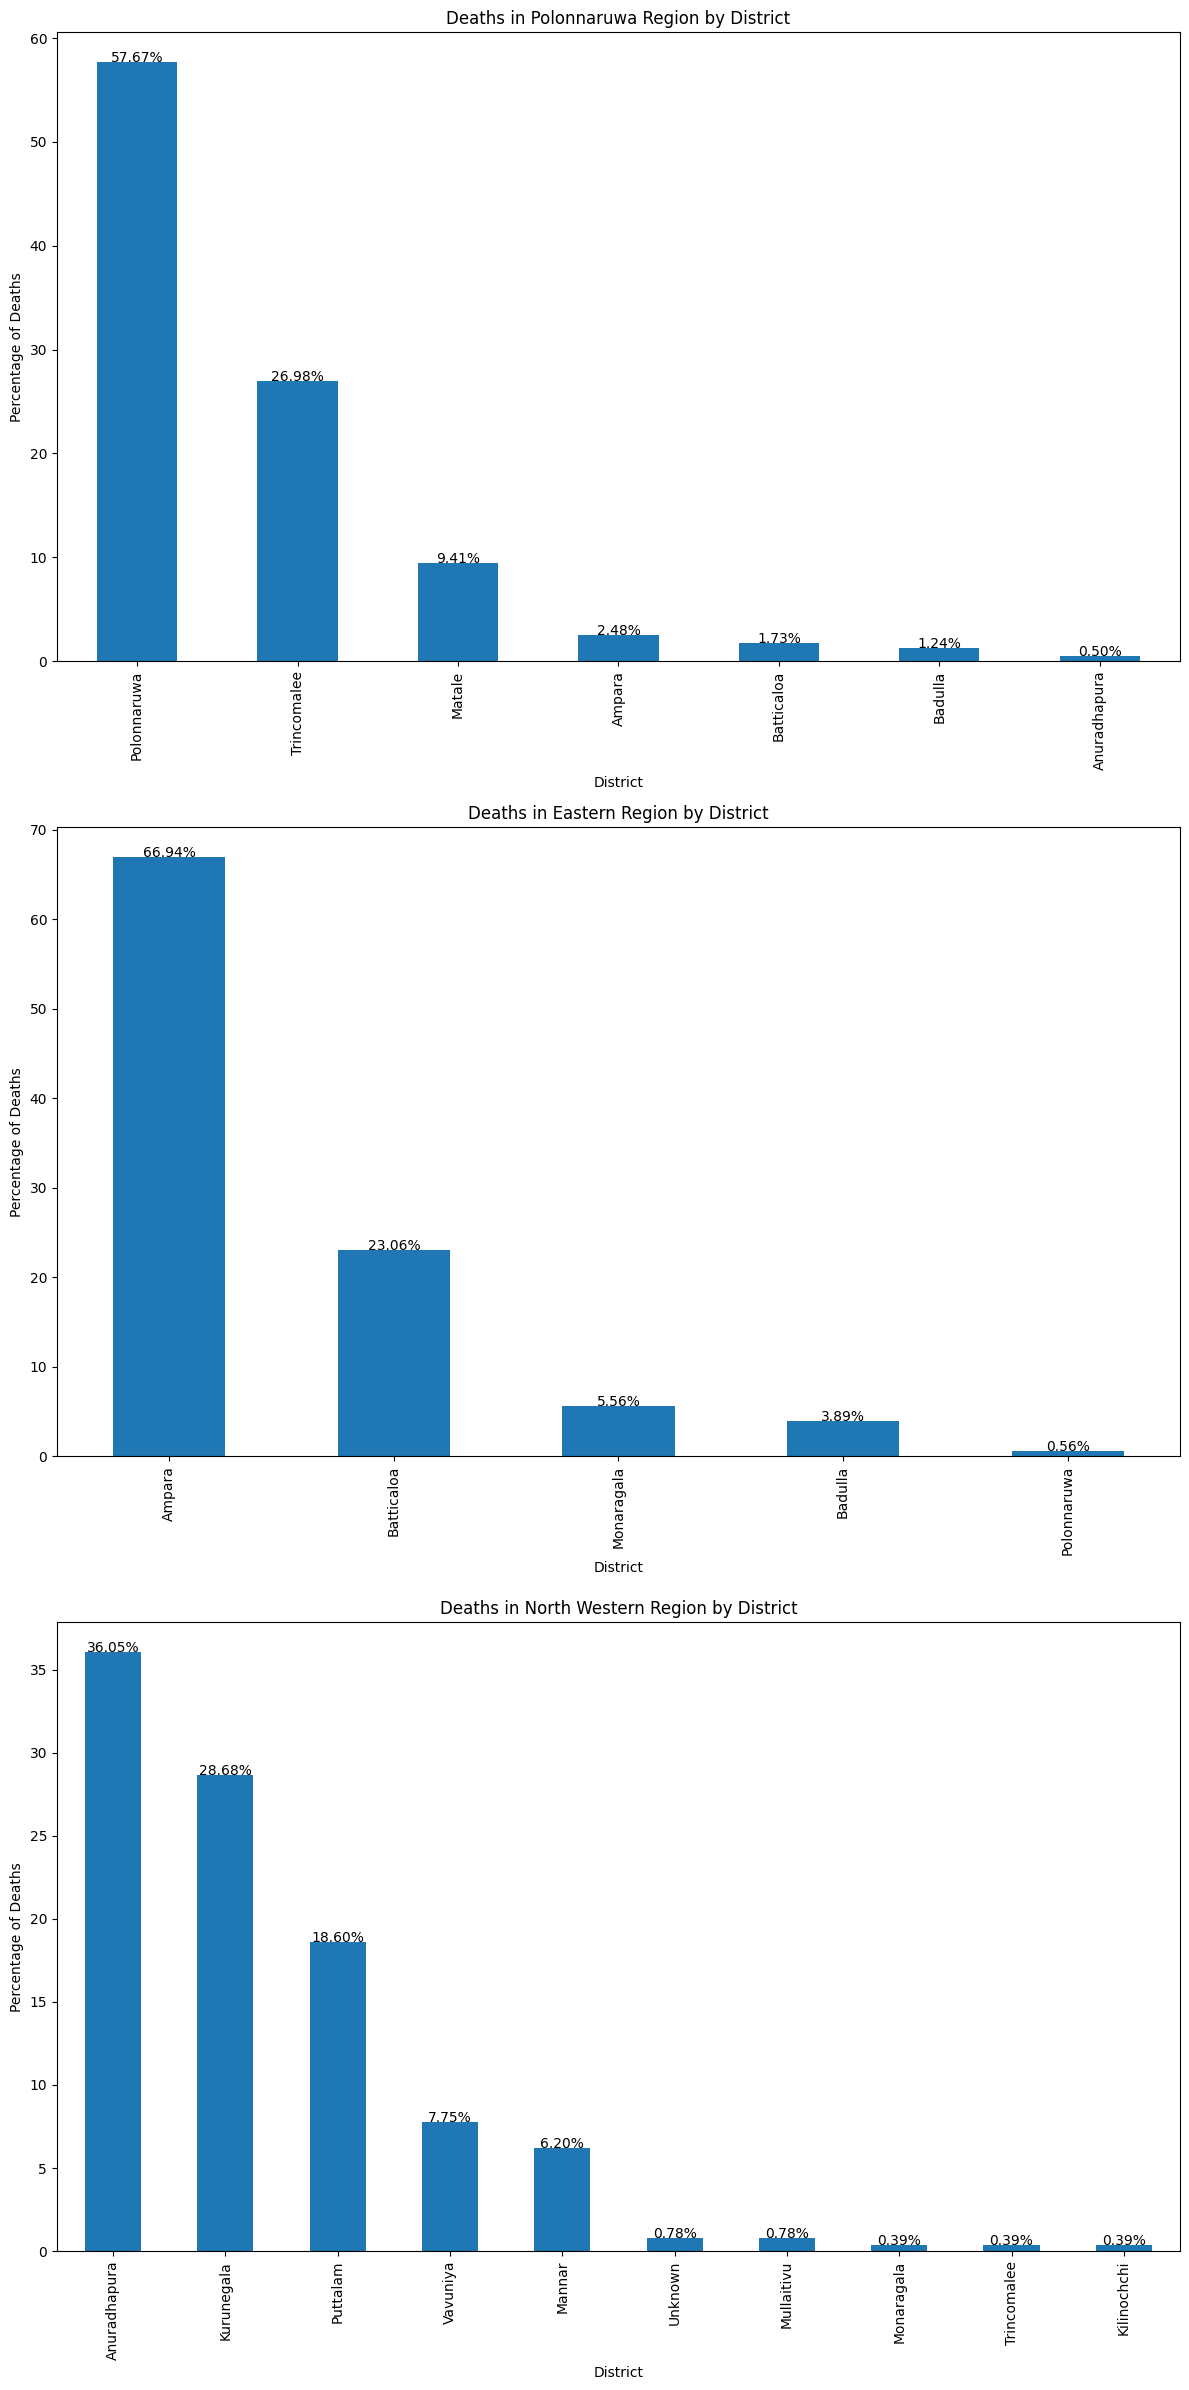

In [27]:
region_deaths = top_regions['Region'].value_counts()

top_3_regions = region_deaths.index
fig, axes = plt.subplots(len(top_3_regions), 1, figsize=(12, 8 * len(top_3_regions)))

for i, region in enumerate(top_3_regions):
    region_data = df[df['Region'] == region]
    
    district_deaths = region_data['District'].value_counts()
    
    ax = axes[i]
    district_deaths_percent = (district_deaths / district_deaths.sum()) * 100  # Calculate percentage
    
    district_deaths_percent.plot(kind='bar', ax=ax)
    ax.set_title(f'Deaths in {region} Region by District')
    ax.set_xlabel('District')
    ax.set_ylabel('Percentage of Deaths')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')
        
plt.tight_layout()
plt.show()


In [28]:
df['Cause of Death'].unique()

array(['Natural', 'Unknown', 'Electrocuted', 'Gunshot', 'Accident',
       'Train Accident', 'Poisned', 'Other', 'Hakkapatas', 'Land mine',
       'At born', 'Lightning'], dtype=object)

## Region_Cause of Death

In [29]:
contingency_table = pd.crosstab(df['Region'], df['Cause of Death'])
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05  

print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

if p < alpha:
    print("There is a significant association between Region and Cause of Death.")
else:
    print("There is no significant association between Region and Cause of Death.")

Chi-Squared Value: 640.5020664614368
P-Value: 1.4986706029496233e-60
There is a significant association between Region and Cause of Death.


The results indicate that there is a significant association between the "Region" and "Cause of Death" variables. The chi-squared value of 1140.27 with an extremely low p-value (1.82e-77) suggests that the distribution of causes of death is not independent of the region. In other words, the region appears to have an impact on the cause of death 

In [30]:
new_df=top_regions[top_regions["Cause of Death"]!='Unknown']
cross_tab = pd.crosstab(new_df['Region'], new_df['Cause of Death'])

cross_tab

Cause of Death,Accident,Electrocuted,Gunshot,Hakkapatas,Land mine,Natural,Other,Poisned,Train Accident
Region,,,,,,,,,
Eastern,6,32,97,63,1,55,12,16,3
North Western,27,22,68,28,5,14,9,24,10
Polonnaruwa,17,25,80,86,2,41,26,10,28


In [31]:
cross_tab = pd.crosstab(new_df['Region'], new_df['Cause of Death'])

cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent_transposed = cross_tab_percent.T
cross_tab_percent_transposed

Region,Eastern,North Western,Polonnaruwa
Cause of Death,,,
Accident,2.105263,13.043478,5.396825
Electrocuted,11.228070,10.628019,7.936508
Gunshot,34.035088,32.850242,25.396825
Hakkapatas,22.105263,13.526570,27.301587
Land mine,0.350877,2.415459,0.634921
Natural,19.298246,6.763285,13.015873
Other,4.210526,4.347826,8.253968
Poisned,5.614035,11.594203,3.174603
Train Accident,1.052632,4.830918,8.888889


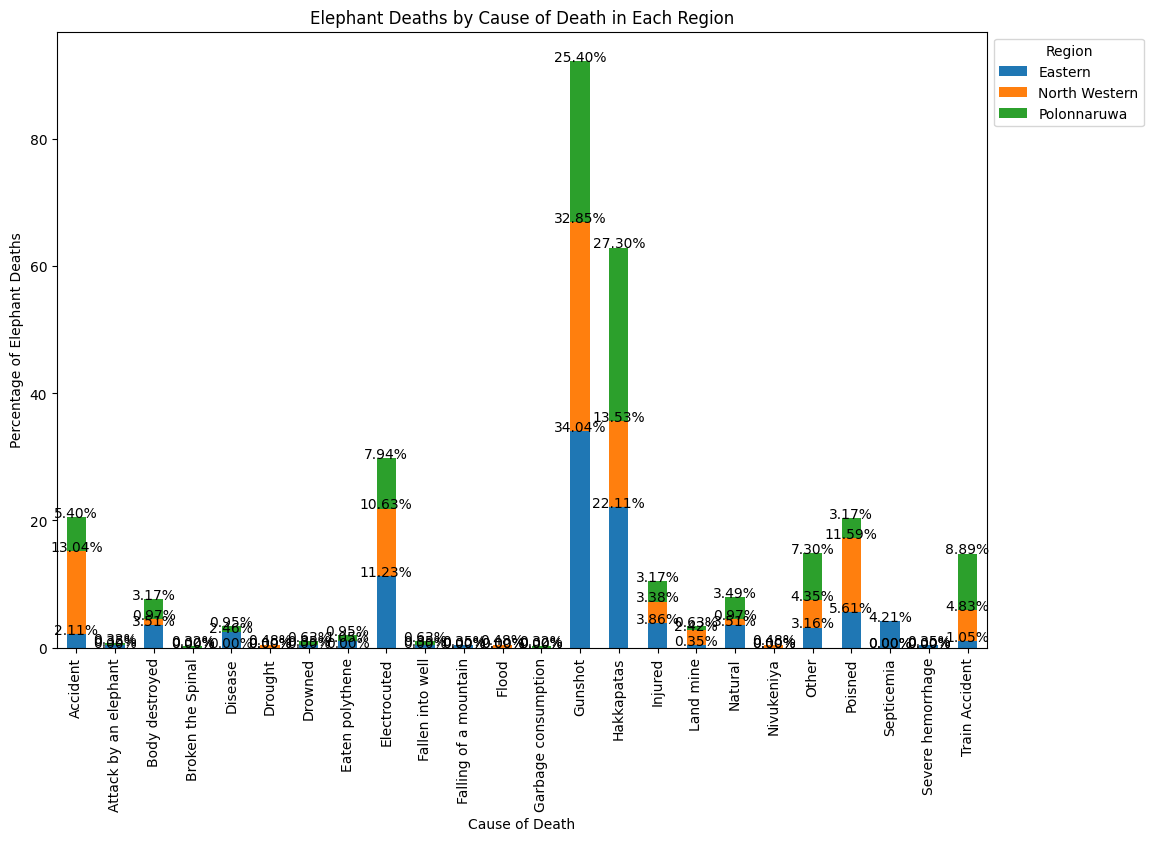

In [14]:
ax = cross_tab_percent_transposed.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Elephant Deaths by Cause of Death in Each Region')
plt.xlabel('Cause of Death')
plt.ylabel('Percentage of Elephant Deaths')

plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

plt.show()



In [15]:
contingency_table = pd.crosstab(df['Region'], df['Cause of Death'])

eastern_gunshot = contingency_table.loc['Eastern', 'Gunshot']
other_regions_gunshot = contingency_table.drop('Eastern').sum().loc['Gunshot']

observed = [[eastern_gunshot, other_regions_gunshot]]

chi2, p, _, _ = chi2_contingency(observed)

alpha = 0.05

print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in the proportion of gunshot deaths in the Eastern region.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportion of gunshot deaths in the Eastern region.")


Chi-Squared Value: 0.0
P-Value: 1.0
Fail to reject the null hypothesis. There is no significant difference in the proportion of gunshot deaths in the Eastern region.


## Region_Gender

In [16]:
contingency_table = pd.crosstab(df['Region'], df['Sex'])
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05  

print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

if p < alpha:
    print("There is a significant association between Region and Sex.")
else:
    print("There is no significant association between Region and Sex.")

Chi-Squared Value: 107.55217985114172
P-Value: 1.1642290889350427e-07
There is a significant association between Region and Sex.


 it means that there is evidence to suggest that the "Region" variable and the "Sex" variable are not independent of each other. In other words, there is a statistically significant relationship between the region in which elephant deaths occur and the gender (sex) of the elephants involved in those deaths.

In [17]:
new_df=top_regions[top_regions["Sex"]!='Unknown']
cross_tab = pd.crosstab(new_df['Region'], new_df['Sex'])
cross_tab


Sex,Calf,Female,Male
Region,,,
Eastern,2,94,249
North Western,0,87,148
Polonnaruwa,2,116,260


In [18]:
cross_tab = pd.crosstab(new_df['Region'], new_df['Sex'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent_transposed = cross_tab_percent.T
cross_tab_percent_transposed

Region,Eastern,North Western,Polonnaruwa
Sex,,,
Calf,0.579710,0.000000,0.529101
Female,27.246377,37.021277,30.687831
Male,72.173913,62.978723,68.783069


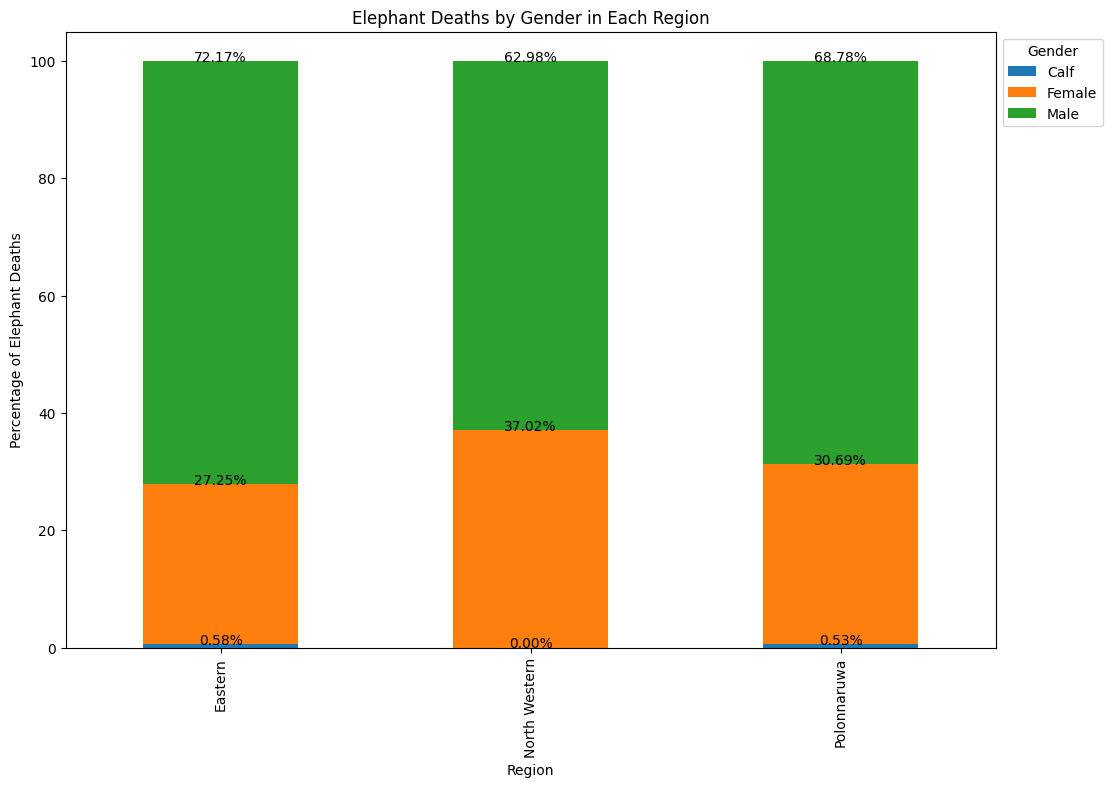

In [19]:
ax = cross_tab_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Elephant Deaths by Gender in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Elephant Deaths')

plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')


plt.show()


## Region_Age Category

In [20]:
contingency_table = pd.crosstab(df['Region'], df['Age Category'])
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05  

print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")

if p < alpha:
    print("There is a significant association between Region and Age Category.")
else:
    print("There is no significant association between Region and Age Category.")

Chi-Squared Value: 172.40339126581011
P-Value: 8.810945753580466e-14
There is a significant association between Region and Age Category.


In [21]:
new_df=top_regions[top_regions["Age Category"]!='Unknown']
cross_tab = pd.crosstab(new_df['Region'], new_df['Age Category'])
cross_tab


Age Category,Calf,Infant,Juvenile,Subadults and adults
Region,,,,
Eastern,19,15,52,246
North Western,24,8,38,162
Polonnaruwa,26,11,69,275


In [22]:
cross_tab = pd.crosstab(new_df['Region'], new_df['Age Category'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
cross_tab_percent_transposed = cross_tab_percent.T
cross_tab_percent_transposed

Region,Eastern,North Western,Polonnaruwa
Age Category,,,
Calf,5.722892,10.344828,6.824147
Infant,4.518072,3.448276,2.887139
Juvenile,15.662651,16.379310,18.110236
Subadults and adults,74.096386,69.827586,72.178478


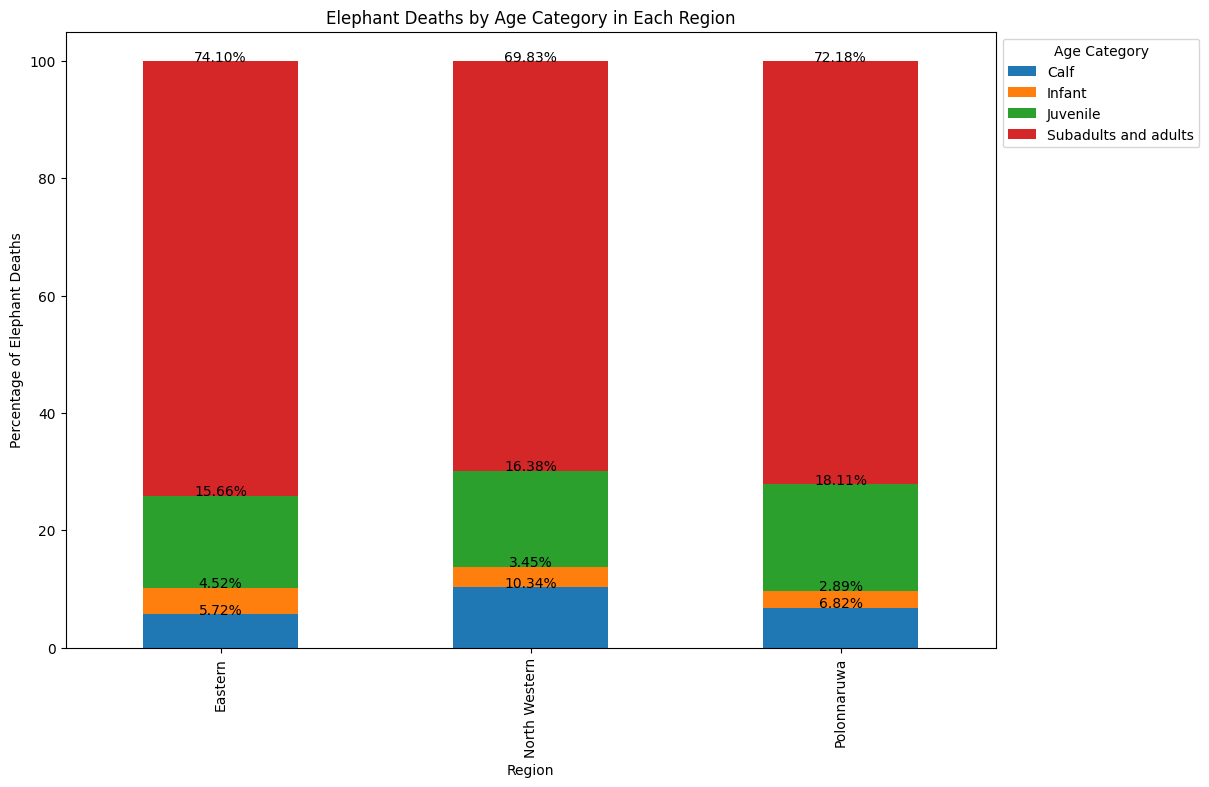

In [23]:
ax = cross_tab_percent.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Elephant Deaths by Age Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Elephant Deaths')

plt.legend(title='Age Category', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')


plt.show()


In [24]:
df

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Kataragama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile
...,...,...,...,...,...,...,...,...,...
1889,1890,Elephant Transit Home,Ratnapura,Unknown,2017-12-28,Natural,Female,Unknown,Unknown
1890,1891,Southern,Ratnapura,Weligepola,2017-12-28,Body destroyed,Male,25,Subadults and adults
1891,1892,Anuradhapura,Anuradhapura,Kabithigollawa,2017-12-28,Body destroyed,Female,20,Subadults and adults
1892,1893,Trincomalee,Trincomalee,Kanthale,2017-12-29,Electrocuted,Unknown,25-30,Subadults and adults
